In [1]:
import numpy as np
import copy
import pandas as pd
from skimage.feature import peak_local_max
import os
import copy
from importlib import reload

%matplotlib inline
import matplotlib.pyplot as plt

#CODATA 2017
kB = 1.38064903E-23  #J/K
Na = 6.022140758E+23 #1/mol

In [2]:
plt.rcParams.update({'font.size': 16})
from matplotlib.ticker import FormatStrFormatter

In [3]:
#import feasst
#import lnPi
import FEASST_analysis

In [4]:
!pwd

/mnt/WS_PN107151/dsideriu/Research/Monte_Carlo/my_FEASST/FEASST_analysis/Examples


In [5]:
#function to tag 'LD' and 'HD' phases
def tag_phases(x):
    if x.base.num_phases_max !=2:
        raise ValueError('bad tag function')
        

    if x.nphase==1:
        if x[0].density<0.5:
            return np.array([0])
        else:
            return np.array([1])
    
    elif x.nphase==2:
        return np.argsort(-x.argmax[0])
        return np.array([0,1])
    else:
        raise ValueError('bad nphase')

[-7.51252087]


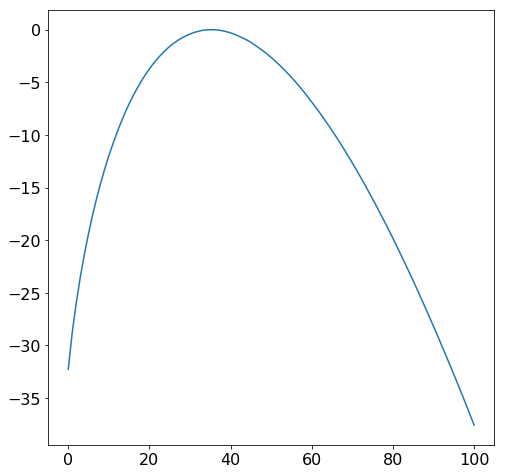

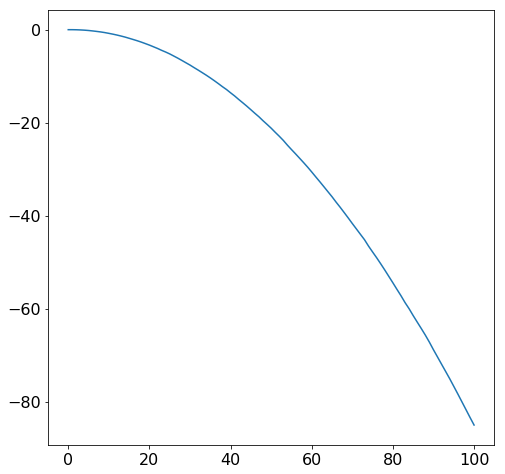

[[35.75025854]]
[-11.14067592]
[134.55724922]

[[32.93615758]]
[-9.46741729]
[126.71142876]


In [6]:
source = "/home/local/NIST/dsideriu/Workstation_Research/Monte_Carlo/my_FEASST/multiprocessing/overlap_4/tmp/"
stub = "rst_core"

new = FEASST_analysis.feasst_analysis.from_restart(source,stub,ftag_phases=tag_phases)
#print(new)
print(new.mu)
#print(new.base.data)

fig = plt.figure(figsize=(8,8))
plt.plot(new.base.coords[0],new.base.data)
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(new.base.coords[0],new.energy)
plt.show()

print(new.Naves)
print(new.Uaves)
#print(new.canonical_Sx)
print(new.Saves_Gibbs)
print()


new2 = new.reweight(new.mu-0.2)
print(new2.Naves)
print(new2.Uaves)
#print(new.canonical_Sx)
print(new2.Saves_Gibbs)

In [7]:
new3 = new.reweight(new.mu-0.05)

In [8]:
a = np.empty(new.base.data.shape)
print(a.shape)

(101,)


In [9]:
print(new.Naves)
print(new.Uaves)
print(new.Saves_Gibbs)

[[35.75025854]]
[-11.14067592]
[134.55724922]


In [10]:
#a = (new.Uaves[0] - np.dot(new.mu,new.Naves) - new.Omegas())*new.beta
a = (new.Uaves - np.dot(new.mu,new.Naves) - new.Omegas())*new.beta
print(a)
print(new.Uaves)     #Returns ndarray
print(new.Naves)     #Returns ndarray of ndarrays
print(new.mu)        #Returns ndarray
print(new.Omegas())  #Returns ndarray

[137.77453448]
[-11.14067592]
[[35.75025854]]
[-7.51252087]
[-87.57746773]


In [11]:
print(new.base.data[0])
print(new.base.ndim)

-32.26156572829285
1


In [12]:
print(new)

#new2 = new.copy(phases='get',argmax='get')

print(new.Uaves)


[-11.14067592]


In [13]:
#CheckTail Op
new2 = new.reweight(new.mu-0.2,CheckTail=True)
#new2 = new.reweight(new.mu-0.2)

print(new2.Uaves)


[-9.46741729]


In [14]:
#new2 = new.reweight(new.mu-0.2,CheckTail=True,Threshold=50.)

In [15]:
print(new.fluctuation(new.energy,new.coords[0]))
print(new.UN_fluc)
print(new.SN_fluc)

[-22.66827302]
[-22.66827302]
[100.39151276]


In [16]:
print(new.SN_fluc/new.N_fluc)
print((new.UN_fluc/new.N_fluc - new.mu)*new.beta)


print(new.fluctuation(new.coords[0],new.base.data)/new.N_fluc)

print(new.SN_fluc/new.N_fluc - new.fluctuation(new.coords[0],new.base.data)/new.N_fluc)

[2.73921054]
[2.75300827]
[-0.01379773]
[2.75300827]


In [17]:
print(new.N_fluc)

[36.6497979]


In [18]:
print(new.mu)
print(new.beta)
print(new.Saves_Gibbs)

[-7.51252087]
0.3993333333
[134.55724922]


In [20]:
print(new.Saves_Gibbs)
print(new.Saves_Boltzmann)
print(new.gibbs_S)
print(new.Saves_Boltzmann-new.Saves_Gibbs)


[134.55724922]
[137.77453448]
[[-3.21728526]]
[3.21728526]


In [34]:
# set up the fluctuations by hand

f_SN = new.generic_property(np.multiply(new.Sx,new.base.coords[0])) - new.generic_property(new.Sx)*new.generic_property(new.base.coords[0])
print(f_SN/new.N_fluc)
f_SN = new.generic_property(np.multiply(new.Sx,new.base.coords[0])) - new.Saves_Gibbs*new.Naves[0]
print(f_SN/new.N_fluc)
#f_SN = new.generic_property(np.multiply(new.Sx,new.base.coords[0])) - new.Saves_Boltzmann*new.Naves[0]
#print(f_SN)
print(new.SN_fluc/new.N_fluc)
print(new.beta*(new.UN_fluc/new.N_fluc-new.mu))
#print(new.Saves_Gibbs)
#print(new.Saves_Boltzmann)

[2.73921054]
[2.73921054]
[2.73921054]
[2.75300827]


In [36]:
for Ni,Ui in zip(new.base.coords[0],new.energy):
    print(Ni,Ui)

0 0.0
1 8.262570059422442e-15
2 -0.017431988020492884
3 -0.05309217289270441
4 -0.10334845323592802
5 -0.17252207899263267
6 -0.2669271884068907
7 -0.37092963820621294
8 -0.4846416443756539
9 -0.6232738018348954
10 -0.7868348800750186
11 -0.9620003425355088
12 -1.1513697316812979
13 -1.3625996228972277
14 -1.5896752187082144
15 -1.8473359341093707
16 -2.109555404288971
17 -2.3783081491597455
18 -2.671788034137673
19 -2.9897870213576616
20 -3.3144347856683556
21 -3.6741884053294216
22 -4.034030970502972
23 -4.438086296713374
24 -4.8051947245745055
25 -5.207499353705493
26 -5.664937363448375
27 -6.123647229512412
28 -6.613201729408599
29 -7.11272634776896
30 -7.6071299466949975
31 -8.152908982690548
32 -8.680635390543184
33 -9.228231829260967
34 -9.78077153482771
35 -10.364827963538321
36 -10.973327598512258
37 -11.604294269898766
38 -12.25984069060269
39 -12.871746843539022
40 -13.573611939579422
41 -14.250662954868838
42 -14.999587057556154
43 -15.714989904936292
44 -16.44643331442774


In [44]:
mus = np.linspace(-15., -6.3,20)
for mu_RW in mus:
    new2 = new.reweight(mu_RW,CheckTail=True)
    print(mu_RW, new2.Naves[0][0], new2.UN_fluc[0], new2.N_fluc[0])

-15.0 1.7225766313842907 -0.05205325761465338 1.727872328836392
-14.542105263157895 2.069595381606316 -0.07527592571956446 2.0786684173623264
-14.08421052631579 2.4871433653860873 -0.10894755116944999 2.501494589013384
-13.626315789473685 2.989641056749444 -0.1576657855954869 3.0102636056513568
-13.16842105263158 3.594169060540861 -0.22782534796019016 3.620065819638887
-12.710526315789474 4.320656098937334 -0.32832183147626415 4.347076201945519
-12.25263157894737 5.192253407187041 -0.47207077598682146 5.211242996855294
-11.794736842105262 6.236733177585498 -0.6793301931788589 6.245289202596204
-11.336842105263159 7.49006837016461 -0.9831746991785333 7.508022928582868
-10.878947368421052 9.00137819773532 -1.4339015135658775 9.080381405196164
-10.421052631578949 10.833219759000599 -2.0960365393550404 11.017770931066082
-9.963157894736842 13.05289373230389 -3.047507489014208 13.322523127358835
-9.505263157894737 15.731572885069571 -4.418254003971654 16.064698081998444
-9.047368421052632 1